## For CBPs

* Find updated info on status of HATS light curves. How long are the baselines,
  at what precision?
* How many EBs will they likely have?
   -> based, e.g., on Kepler EB statistics. (Get & read the EB working group's
    papers)
* What was the Kepler EB->CBP rate? (e.g. review Haghihipour's talk)
    Would *ANY* of these have been detected by a survey like HATS?
* How many will be at sufficient precision for single-transit detections?
* How many will be at sufficient precision for phase-folded detections?
* What would necessary properties of the CBP population _BE_ in order to expect
  _any_ CBPs in the HAT data?

* Should this be sufficient to detect CBPs based on Kepler data?
  (what was the thing I mentioned in my application?)

Getting into the data weeds:
* What are common CBP search methods? Uncommon ones?
* For instance... what would the necessary conditions be just on _eclipse timing_
  to constitute a bonafide CBP detection?
  (the literature on this is probably more scattered, & more oriented on heuristics
  to numerical N body orbit intergration)

## For the M dwarf search

HAT bandpass:

In [1]:
import IPython.display as ipd

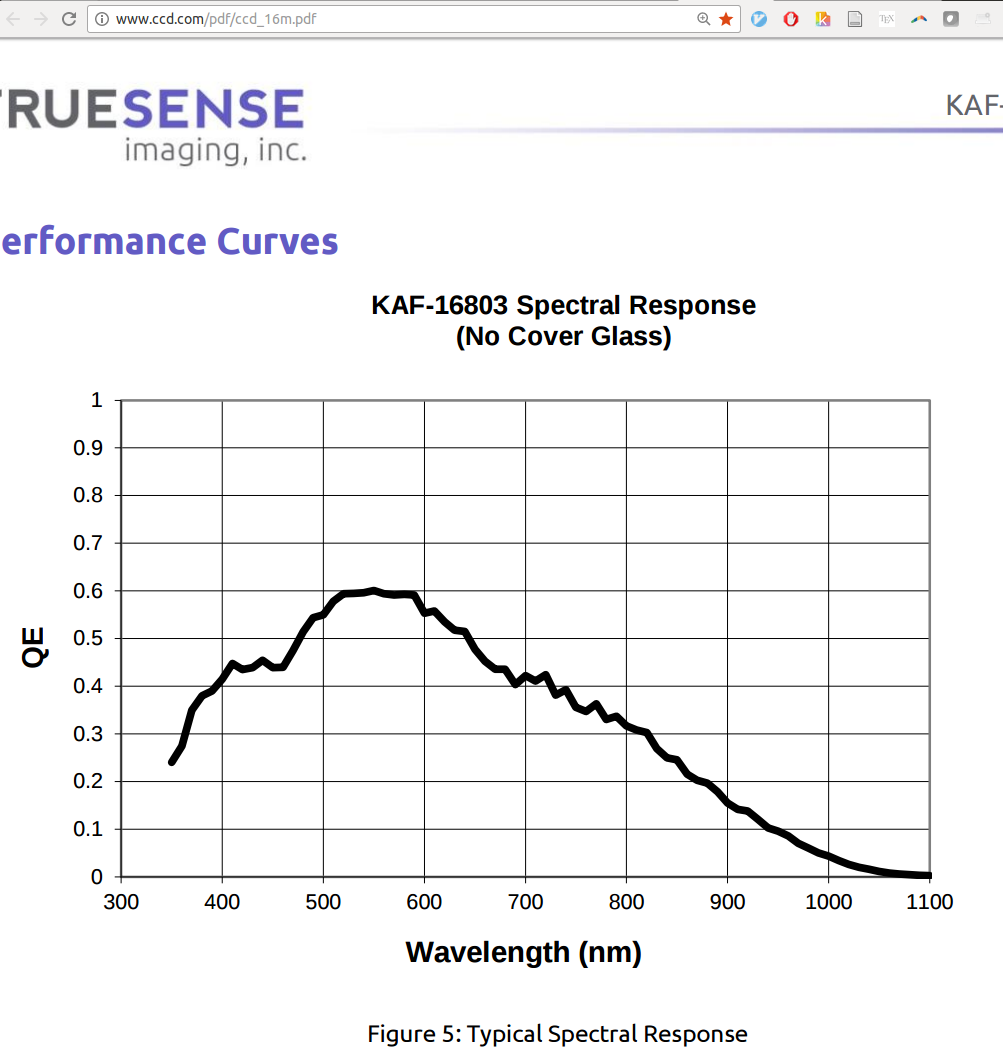

In [2]:
ipd.Image('what_is_HAT_bandpass.png')

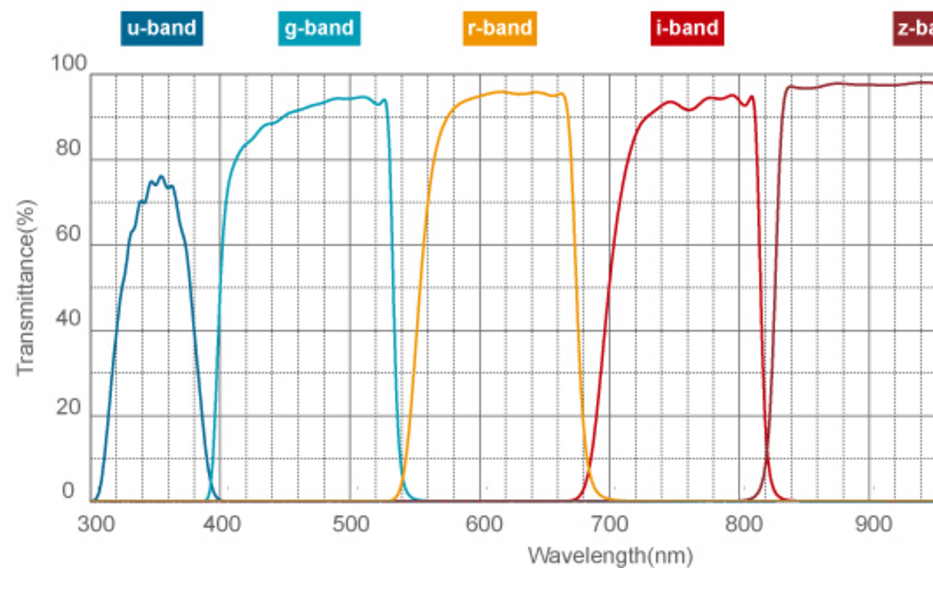

In [3]:
ipd.Image('r_band_sloan_filters.png')

So M dwarf sensitivity is _not_ what they're specializing in.

16/09/07

## Find updated info on status of HATS light curves. How long are the baselines, at what precision?
  
Over first 2 years: 1,060,000 4k\*4k 4 minute images.
And ~18 8.2x8.2 square degree fields have >10,000 observations per field.
 


In [4]:
print('Typical HAT baseline is: {:.1f} days '.format(round(1e4*4 / (60*24), 1)))

Typical HAT baseline is: 27.8 days 


And the sensitivity is:

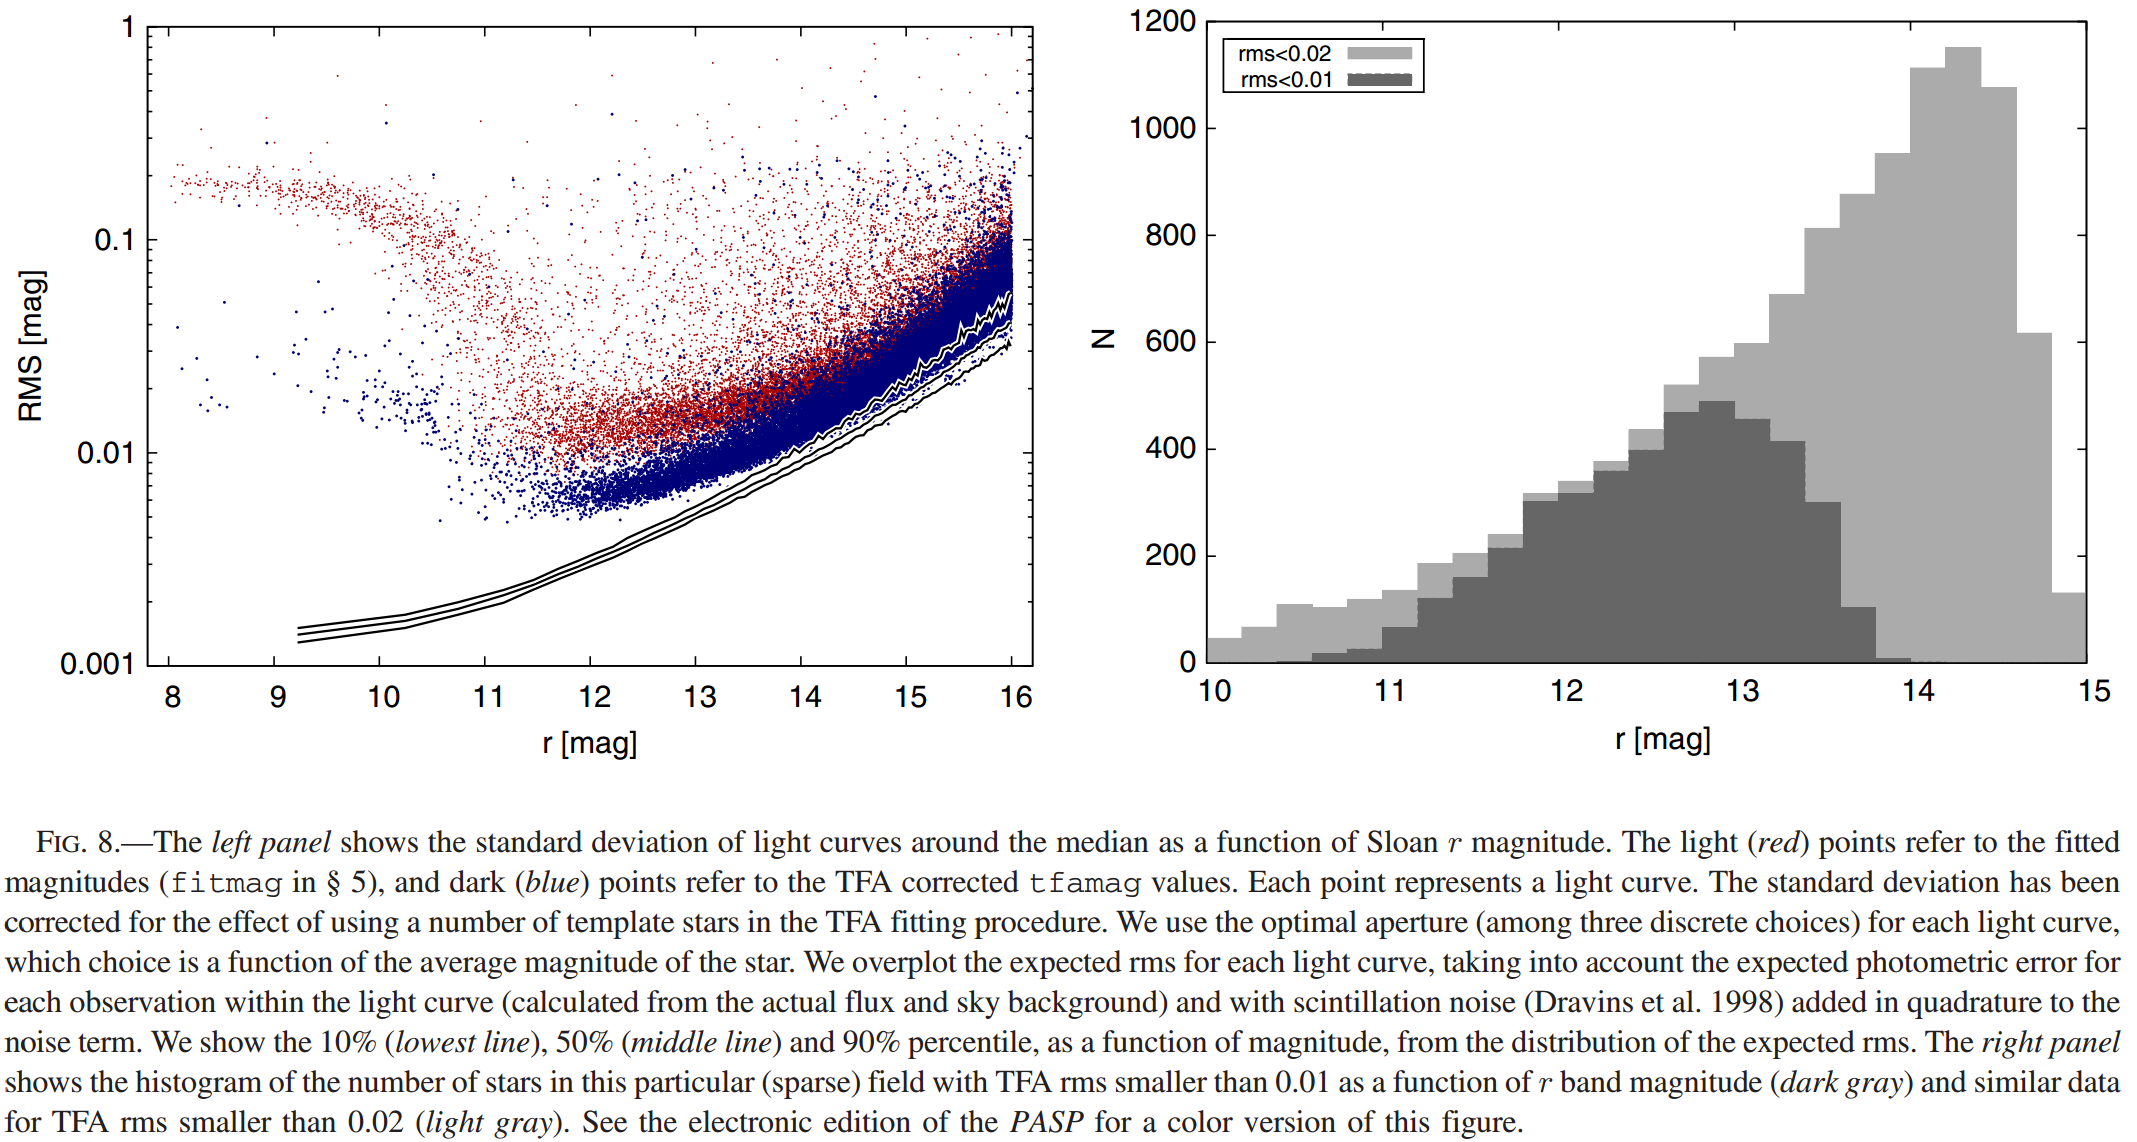

In [5]:
from IPython.display import Image
Image('HAT_precision.png')

We are told the right figure is a sparse field. Bin widths are 0.2mag, so there are around

In [6]:
int(0.5 * 1000 * (14.5-10.8) / 0.2 )

9249

In [7]:
0.5*500*(13-10.8)/0.2

2749.9999999999986

In [8]:
4/9.

0.4444444444444444

stars in it. This means that perhaps a less-sparse field will have around 20k stars in it. And sparse fields have around 10k stars in them.

This means that after 2 years, they have at minimum



In [9]:
print('{:1g}'.format(18 * 1e4))

180000


light curves, and more likely closer to

In [10]:
print('{:g}'.format(18 * 2e4))

360000


stars with light curves at less than 2% precision (20 mmag), at around 30 days (to more) of coverage. Note this was at the end of 2012, after 2 years of observing.
In _discussion_, Gaspar claimed that they have 4 million light curves at <2% precision, although it may be the case that a good fraction of them have $t_\mathrm{obs}<30$ day.

## How many EBs will they likely have? based, e.g., on Kepler EB statistics. (Get & read the EB working group's papers)


Kepler's EB team found around 10 CBPs from 2000 EBs (give or take, perhaps more like 3000 EBs with modern updates).


In [11]:
import xml.etree.ElementTree as ET, urllib.request, gzip, io
url = "https://github.com/OpenExoplanetCatalogue/oec_gzip/raw/master/systems.xml.gz"
oec = ET.parse(gzip.GzipFile(fileobj=io.BytesIO(urllib.request.urlopen(url).read())))

# Output mass and radius of all planets
MR_list = []
for planet in oec.findall(".//planet"):
    MR_list.append([planet.findtext("mass"), planet.findtext("radius")])

# Find all circumbinary planets 
CBP_names = []
for planet in oec.findall(".//binary/planet"):
    CBP_names.append(planet.findtext("name"))

# Output distance to planetary system (in pc, if known) and number of planets in system
distances = []
for system in oec.findall(".//system"):
    distances.append([system.findtext("distance"), len(system.findall(".//planet"))])

In [12]:
CBP_names

['2M 1938+4603 b',
 'DP Leo b',
 'FL Lyr b',
 'FW Tau b',
 'HU Aqr (AB) b',
 'HU Aqr (AB) c',
 'HU Aqr (AB) d',
 'HW Vir (AB) b',
 'Kepler-16 (AB) b',
 'Kepler-34 (AB) b',
 'Kepler-35 (AB) b',
 'Kepler-38 (AB) b',
 'Kepler-413 b',
 'Kepler-47 (AB) b',
 'Kepler-47 (AB) c',
 'KIC 9632895 b',
 'KOI-2939 b',
 'NN Ser (AB) c',
 'NN Ser (AB) d',
 'NSVS 14256825 c',
 'NSVS 14256825 d',
 'NY Virginis (AB) b',
 'PH-1 A(ab) b',
 'PSR B1620-26 b',
 'Ross 458 C',
 'ROXs 42 B b',
 'RR Cae (AB) b',
 'SR 12 C']

Compare these names with what I know from papers:

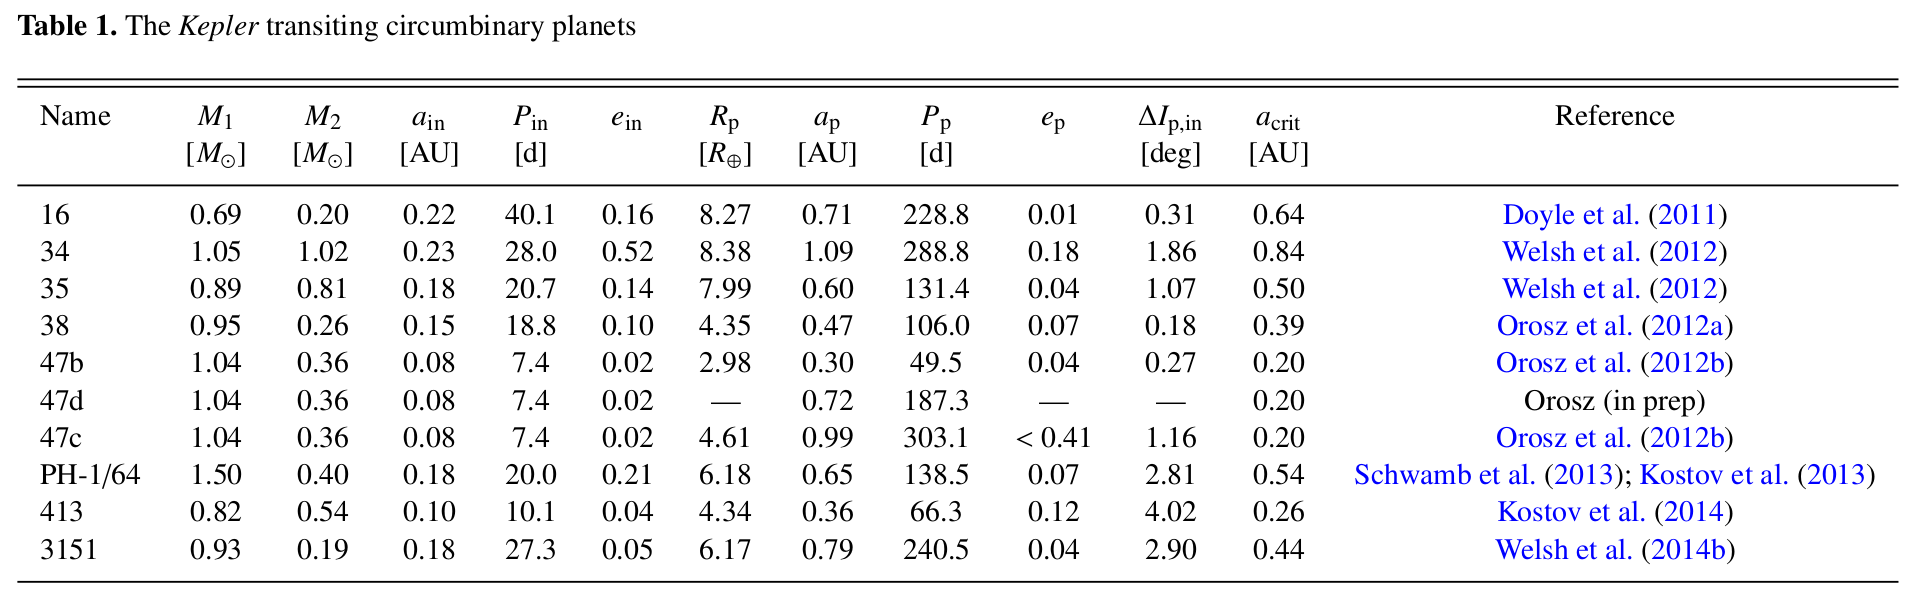

In [13]:
Image('all_kepler_transiting_CBPs.png') # thanks to Martin, Fabrycky 2016

In [14]:
import pandas as pd

In [15]:
m_star, ix = [], -1
for binary in oec.findall('.//binary'):
    for planet in binary.findall('.//planet'):
        m_star.append([binary.findtext('name'), planet.findtext('name'), planet.findtext('radius')])
        ix += 1
    for star in binary.findall('.//star'):
        m_star[ix].append(star.findtext('name'))
        m_star[ix].append(star.findtext('mass'))

In [16]:
CBPs = {'name':[], 'period_planet_[day]': [], 
        'is_transiting': [], 'discovery_method': []}
for planet in oec.findall('.//binary/planet'):
    CBPs['name'].append(planet.findtext('name'))
    CBPs['period_planet_[day]'].append(planet.findtext('period'))
    CBPs['is_transiting'].append(planet.findtext('istransiting'))
    CBPs['discovery_method'].append(planet.findtext('discoverymethod'))
    

    
CBPs = pd.DataFrame(CBPs, index=CBPs['name'])    

In [17]:
CBPs

,discovery_method,is_transiting,name,period_planet_[day]
2M 1938+4603 b,timing,None,2M 1938+4603 b,416
DP Leo b,timing,1,DP Leo b,10230
FL Lyr b,timing,None,FL Lyr b,
FW Tau b,imaging,None,FW Tau b,None
HU Aqr (AB) b,timing,None,HU Aqr (AB) b,None
HU Aqr (AB) c,timing,None,HU Aqr (AB) c,None
HU Aqr (AB) d,timing,None,HU Aqr (AB) d,None
HW Vir (AB) b,timing,None,HW Vir (AB) b,4640
Kepler-16 (AB) b,transit,1,Kepler-16 (AB) b,228.776
Kepler-34 (AB) b,transit,1,Kepler-34 (AB) b,288.822


In [18]:
foo = oec.findall(".//binary/planet")[0]

In [19]:
bar = foo.getiterator()

* What was the Kepler EB->CBP rate? (e.g. review Haghihipour's talk)
    Would *ANY* of these have been detected by a survey like HATS?
* How many will be at sufficient precision for single-transit detections?
* How many will be at sufficient precision for phase-folded detections?
* What would necessary properties of the CBP population _BE_ in order to expect
  _any_ CBPs in the HAT data?

* Should this be sufficient to detect CBPs based on Kepler data?
  (what was the thing I mentioned in my application?)
